In [1]:
#construct a decision tree classifier

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import DataProcess as DP

In [22]:
for subj_n in range(1,10):
    #load the data
    subj_filename='./PAMAP2_Dataset/Protocol/subject10'+str(subj_n)+'.dat'
    HR_rest,HR_max=DP.HR_lim[subj_n]
    dp=DP.dataprocess(subj_filename,HR_rest,HR_max)
    np.save('data'+str(subj_n)+'.npy', (dp.feat_labels,dp.data_segmented))

In [2]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [3]:
[x.shape for x in datalabels]

[(426, 125),
 (453, 125),
 (292, 125),
 (399, 125),
 (472, 125),
 (432, 125),
 (398, 125),
 (450, 125),
 (8, 125)]

In [4]:
datalabels=np.vstack(datalabels)

In [5]:
#shuffle data
np.random.shuffle(datalabels)

traindata=datalabels[:,:-1]
trainlabels=datalabels[:,-1]

In [6]:
cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
cls.fit(traindata,trainlabels)
cross_val_score(cls, traindata, trainlabels)

array([0.92114695, 0.91974752, 0.91312217])

In [7]:
y=cls.feature_importances_
a=[[feature_names[i],y[i]] for i in range(len(y))]
a.sort(key=lambda x:-x[1])

In [8]:
a[:20]

[['chest_acc16g_y_std', 0.17960622189167386],
 ['chest_acc16g_z_median', 0.12599495730144245],
 ['ankle_gyro_z_std', 0.12101871355061071],
 ['hand_acc16g_y_peak', 0.11612099303923817],
 ['chest_mag_x_std', 0.10868619219066311],
 ['hand_acc16g_x_median', 0.09785354603393834],
 ['ankle_acc16g_x_std', 0.08862562158710628],
 ['hand_acc16g_z_mean', 0.07119189167660332],
 ['chest_gyro_y_mean', 0.059735954285815976],
 ['chest_gyro_x_std', 0.031165908442907713],
 ['heart_rate_mean', 0.0],
 ['hand_temp_mean', 0.0],
 ['hand_acc16g_x_mean', 0.0],
 ['hand_acc16g_y_mean', 0.0],
 ['hand_gyro_x_mean', 0.0],
 ['hand_gyro_y_mean', 0.0],
 ['hand_gyro_z_mean', 0.0],
 ['hand_mag_x_mean', 0.0],
 ['hand_mag_y_mean', 0.0],
 ['hand_mag_z_mean', 0.0]]

In [9]:
class_name=[DP.activity_dict[x] for x in np.unique(trainlabels)]

In [10]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names[:-1],  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [11]:
#check LOSO cross validation!

mean_scores=[]
for a in [14]:
    scores=[]
    for iout in range(1,9):

        datalabels=[]
        for i in range(1,iout):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        for i in range(iout+1,9):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        datalabels=np.vstack(datalabels)

        feature_names,validdatalabels=np.load('data'+str(iout)+'.npy')
        validdata=validdatalabels[:,:-1]
        validlabels=validdatalabels[:,-1]

        #shuffle data
        np.random.shuffle(datalabels)

        traindata=datalabels[:,:-1]
        trainlabels=datalabels[:,-1]

        cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
        cls.fit(traindata,trainlabels)

        scores.append(cls.score(validdata,validlabels))
    mean_scores.append(np.mean(scores))
    print('a=',a,'mean_score=',np.mean(scores))

a= 14 mean_score= 0.8215223442890454


In [12]:
scores

[0.8474178403755869,
 0.7814569536423841,
 0.8904109589041096,
 0.7844611528822055,
 0.7648305084745762,
 0.8055555555555556,
 0.8869346733668342,
 0.8111111111111111]

In [13]:
#mean score=0.84 after cross validation for hyperparameters, much worse than before
#maybe the overlapping time windows caused contamination between validation and training data

In [14]:
cls.score(validdata,validlabels)

0.8111111111111111

In [15]:
y_pred=cls.predict(validdata)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(validlabels, y_pred)

array([[ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20,  2, 21,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 56,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 13,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 40,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  1,  8,  0,  0,  0,  0,  0,  0,  4]], dtype=int64)

In [17]:
#lying misclassfied as sitting
#maybe need to recalibrate for each subject, ie. normalize data for a given subject?

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

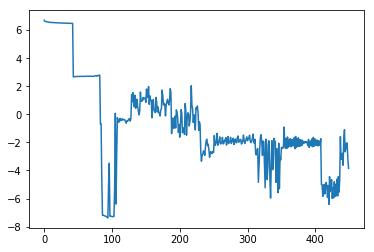

In [19]:
fig,ax=plt.subplots()
j=np.argwhere(np.array(feature_names)=='ankle_acc16g_y_mean')[0,0]
ax.plot(validdata[:,j])

In [20]:
from sklearn.model_selection import train_test_split
X=datalabels[:,:98]
y=datalabels[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
cls=DecisionTreeClassifier()
cls.fit(X_train,y_train)
cls.score(X_test,y_test)

0.951304347826087